# Spam or Ham (project 1)

## 1- Introduction with the Bernoulli model


We say that a random variables $X \in \{0, 1\}$ follows a Bernoulli distribution of parameter $\theta$ if $\mathbb{P}(X = 1) = \theta$ and $\mathbb{P}(X = 0) = 1 − \theta$.


1.  Show that we can write the probability distribution of $X$ in a compact form as : 
$$
\mathbb{P}(X = x) = \theta^{x} (1 − \theta)^{1−x}
$$

2. Suppose now that we have a set of n independent variables $x_1,...,x_n$. If we note $n_1 = \sum_{i=1}^n \mathbb{1}_{\{x_i=1\}}$ and $n_0 = n − n_1$, show that :
$$
\mathbb{P}(x_1,\ldots,x_n \mid \theta)=\theta^{n_1} (1−\theta)^{n_0}
$$

3. Show that the maximum likelihood estimator is $\hat{\theta}_{ML} = \frac{n_1}{n}$

4. A conjugate prior for the Bernoulli distribution is the Beta distribution. 
$$
Beta(\theta \mid a, b) \propto \theta^{a−1} (1 − \theta)^{b−1}
$$
The Beta distribution has the following properties for its expectation and mode (for more details you can look in one of the books like the Bishop):
$$
\mathbb{E}(\theta) = \frac{a}{a+b} \text{, mode}(\theta) = \frac{a-1}{a+b-2}
$$

Show that with a $Beta(a,b)$ prior the posterior distribution 
$\mathbb{P}(\theta \mid x_1,\ldots, x_n)$
is proportional to $\theta^{n_1+a-1} \cdot (1 − \theta)^{n_0+b-1}$ 

5. (Those two questions are optional, you can also simply use the result in the following)

  a. Show that the maximum a posteriori _mode_ estimate is in the form $\bar{\theta}_{MAP} = \frac{n_1+a-1}{n+a+b-2}$

  b. Show that the maximum a posteriori 
_mean_ estimate is in the form $\hat{\theta}_{MAP} = \mathbb{E}(\theta \mid x_1,\ldots, x_n) = 
\int_{\theta =0}^1 \mathbb{P}(\theta \mid x_1\ldots x_n) d\theta  = \frac{n_1+a}{n+a+b}$


## _write your answers to the questions here (you can also provide a scanned pdf of your answers with the notebook)_

## Spam classifier

The goal of this small project is to use a Naive bayes classifier to build a spam filter. To build our filter, we will use a dataset of 5,572 SMS messages put together by Tiago A. Almeida and José María Gómez Hidalgo. 
The dataset and the article describing the dataset are in the whiteboard directory together with this notebook. Of note, the SMS messages have already been processed for ease of use: all punctuation marks have been removed and the text has been transformed into lowercase. It is also common practice to remove any stop words such as `a`, `as`, `the` and to perform stemming (reduce words to their base form, such as stripping  the final `s*` in plural words, or the `*ing` from verbs (e.g., running becomes run)). For the sake of simplicity, we did not do that in this exercise.

We will use a bag of word model:
 - We construct a corpus of the possible words $\mathcal{D} = \{w_1, \ldots , w_d\}$.
 - Each document is described by a vector of binary values $(x^{(1)}, \ldots , x^{(d)})$ where $x^{(i)} = 1$ if $w_i$ occurs in the document and $0$ otherwise.

The classification task is to predict for an SMS message if it is a _spam_ or a _ham_ (e.g. non-spam).

Our data is thus $\mathbf{x} = (x^{(1)},\ldots, x^{(d)})$, $x^{(i)} \in \{0,1\}$ and $y \in \{s,h\}$
We hypothesise that the values $x^{(i)}$ are drawn according to a Bernoulli distribution whose parameter depends on the class:
$$
\mathbb{P}(x^{(i)} \mid y = s) = \theta_{i,s}^{x^{(i)}} \cdot (1-\theta_{i,s})^{1-x^{(i)}}
$$
and 
$$
\mathbb{P}(x^{(i)} \mid y = h) = \theta_{i,h}^{x^{(i)}} \cdot (1-\theta_{i,h})^{1-x^{(i)}}
$$
As we will use a naive Bayes classifier, the occurences of the different words are independent from each other.
\begin{align}
\mathbb{P}(\mathbf{x} \mid y = s) & = \prod_{i=1}^{d} \mathbb{P} (x^{(i)} \mid y = s)\\
  & =  \prod_{i=1}^{d} \theta_{i,s}^{x^{(i)}} \cdot (1-\theta_{i,s})^{1-x^{(i)}}
\end{align}


## Importing library and loading dataset

In [2]:
%matplotlib inline
import numpy as np
from collections import Counter

##Load the dataset (if in the same directory as the notebook)
sms_data = np.loadtxt("./SMSSpamCollection_cleaned.csv", delimiter="\t", skiprows=1, dtype=str)

## create test data set for checkpointing
checkpoint_data = np.array([['spam', 'dear researcher submit manuscript money'], 
          ['ham','dear friend meet beer'],
          ['ham', 'dear friend meet you']], dtype=str)

In [3]:
##Check the dataset
sms_data


array([['ham',
        'go until jurong point  crazy   available only in bugis n great world la e buffet    cine there got amore wat   '],
       ['ham', 'ok lar    joking wif u oni   '],
       ['spam',
        'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005  text fa to 87121 to receive entry question std txt rate t c s apply 08452810075over18 s'],
       ...,
       ['ham',
        'pity    was in mood for that  so   any other suggestions '],
       ['ham',
        'the guy did some bitching but i acted like i d be interested in buying something else next week and he gave it to us for free'],
       ['ham', 'rofl  its true to its name']], dtype='<U910')

In [4]:
##Check the size of the dataset
num_messages = sms_data.shape[0]
print(num_messages)

##third message is a...
print("Third message is a:", sms_data[2][0])
##dividing the third message into words
print(sms_data[2][1].split())

5572
Third message is a: spam
['free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', 'to', '87121', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 't', 'c', 's', 'apply', '08452810075over18', 's']


## 2 - Construction of the Corpus

Construct the corpus $\mathcal{D}$ of all words in the dataset. The corpus will be represented as a hash table where each key is a unique word in the dataset and each value is the row index for that word. 
 - How many unique words are there? 
 - What are the 10 most common words (_e.g._ occuring in the most documents)?
 - Transform the set of messages in the form of a binary matrix of word occurrences.
 
 You can evaluate whether your implementation works using the checkpoint_data array. For this dataset the corpus could look as follows :

`{'dear': 0, 'researcher': 1, 'submit': 2, 'manuscript': 3, 'money': 4, 'friend': 5, 'meet': 6, 'beer': 7, 'you': 8}`
(of course you could have other index values for the words). 

The recoding of the checkpoint data will give you the following numpy array:

```
[[1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 1. 1. 0.]
 [1. 0. 0. 0. 0. 1. 1. 0. 1.]]
```

In [5]:
def construct_corpus(data):
    """
    np.array[str, str] -> dict[str:int]
    
    from a 2D array of str, return a hash table
    """
    corpus = {}
    corpus_index = 0
    for row in data:
        message = row[1]
        words = message.split()
        for word in words:
            if word not in corpus:
                corpus[word] = corpus_index
                corpus_index += 1
    return corpus

checkpoint_corpus = construct_corpus(checkpoint_data)
print(checkpoint_corpus)


{'dear': 0, 'researcher': 1, 'submit': 2, 'manuscript': 3, 'money': 4, 'friend': 5, 'meet': 6, 'beer': 7, 'you': 8}


In [6]:

    
def recode_messages(data, corpus):
    """
    np.array[str, str] * dict[str:int] -> np.array[int, int]
    
    returns the binary matrix encoding 
    """
    
    number_messages = data.shape[0] #gives the number of messages which should correspond to the number of rows in the binary matrix
    number_words = len(corpus) #gives the number of columns of the binary matrix

    binary_matrix = np.zeros(shape = (number_messages, number_words)) #create an empty binary matrix

    for i in range(number_messages):
        message = data[i][1]
        words = message.split()
        for word in words:
            index = corpus[word]
            binary_matrix[i][index] = 1
    return binary_matrix

checkpoint_matrix = recode_messages(checkpoint_data, checkpoint_corpus)

D = construct_corpus(sms_data)

sms_matrix = recode_messages(sms_data, D)

print(checkpoint_matrix)



    

[[1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 1. 1. 0.]
 [1. 0. 0. 0. 0. 1. 1. 0. 1.]]


## 3 - Construct a training and a testing set and estimation of parameters


To do the evaluation of the model afterward we will split the dataset randomly in two: 
- one dataset for training (80% of the messages) 
- one dataset for testing (20% of the messages).

If you are familiar with it, you can use the `sklearn.model_selection` functions to construct the train and test datasets.


In [7]:
from sklearn.model_selection import train_test_split as sk_train_test_split

def train_test_split(X, Y, train_percentage=0.8):
    assert X.shape[0] == Y.shape[0]

    number_examples = X.shape[0]
    num_train = int(train_percentage * number_examples)
    
    X_train, X_test, Y_train, Y_test = sk_train_test_split(X, 
                                                        Y, 
                                                        test_size = 1-train_percentage, 
                                                        random_state = 1)
    return X_train, X_test, Y_train, Y_test
    

def split_smsData(data):
    corpus = construct_corpus(data)
    matrix_encodings = recode_messages(data, corpus)                        # = X
    labels = np.array(list(str(data[i][0]) for i in range(len(data))))      # = Y

    return train_test_split(matrix_encodings, labels)

X_train, X_test, Y_train, Y_test = split_smsData(sms_data)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


(4457, 8753) (1115, 8753) (4457,) (1115,)


## 4 - Estimation of the model parameters

We will now estimate our model on the training set. This means estimating two types of parameters: the class prior, and the conditional word occurence probabilities.

1.  Estimate the class prior $\mathbb{P}(c) = \mathbb{P}(y = c), (c = s, h)$
2.  Using the results from section 1, compute the Maximum a posteriori estimator for the $d \times 2$ matrix of parameters.
$$
\Theta = \left(
\begin{array}{cc}
\theta_{1,h}   & \theta_{1,s} \\
\theta_{2,h} & \theta_{2,s} \\
\vdots & \vdots \\
\theta_{d,h} & \theta_{d,s} \\
\end{array}
\right).
$$ You can use as conjugate prior a Beta(1, 1) distribution for instance (then $\theta_{i,c} = \frac{n_{i,c}+1}{N+2}$ where $n_{i,c}$ is the number of documents from the class $c$ where the word $w_i$ is present and $N$ is the total number of documents).

When applied to the checkpoint data, your $\Theta$ matrix should look like this:

```
# h    s
[[0.75 0.66666667]  #'dear'
 [0.25 0.66666667]  #'researcher'
 [0.25 0.66666667]  #'submit'
 [0.25 0.66666667]  #'manuscript'
 [0.25 0.66666667]  #'money'
 [0.75 0.33333333]  #'friend'
 [0.75 0.33333333]  #'meet'
 [0.5  0.33333333]  #'beer'
 [0.5  0.33333333]] #'you'
```

3. Represent the fitted class conditional densities $(\theta_{i,h})_{i \in \mathcal{D}}$ and $(\theta_{i,s})_{i \in \mathcal{D}}$ like on the corresponding slide of the course.


In [8]:
## Your code here for class priors

def class_priors(Y):
    num_spam = num_ham = 0

    for category in Y:
        if category == "spam":
            num_spam += 1
        else:
            num_ham += 1
    prior_spam = num_spam/(num_spam + num_ham)
    prior_ham = 1 - prior_spam

    return prior_spam, prior_ham, num_spam, num_ham

    
def estimate_proportions(X_matrix, Y_vector):
    """
    estimate the matrix theta
    """
    #your code here

    prior_spam, prior_ham, num_spam, num_ham = class_priors(Y_vector)

    #the following vectors represent the number of spam / ham classifications at each position in the word hash table = how many words j (= for example "house") are classified as spam / ham
    count_words_ham_vector = np.zeros(X_matrix.shape[1])    #the count vector should have the length of the number of *words* that are represented in the X_matrix
    count_words_spam_vector = np.zeros(X_matrix.shape[1])

    # depending on the category, the line from the X_matrix (filled with 1 and 0) 
    # is added to the counts vector for each category --> thereby increasing the count by 1 if the category is hit
    for i, row in enumerate(X_matrix):
        if Y_vector[i] == "spam":
            count_words_spam_vector += row  #if a row is spam, it is added to the counts vector for spam -> each position where a word is hit is increased in the count by one
        else:
            count_words_ham_vector += row
    
    #see lecture slide 19: 
    max_posterior_spam = (count_words_spam_vector + 1)/(num_spam + 2)
    max_posterior_ham = (count_words_ham_vector + 1)/(num_ham + 2)

    theta_matrix = np.vstack([max_posterior_ham, max_posterior_spam]).T

    return theta_matrix, prior_ham, prior_spam


theta, prior_ham, prior_spam = estimate_proportions(X_train, Y_train)

checkpoint_categories = checkpoint_data[:, 0]
testTheta, _, _ = estimate_proportions(checkpoint_matrix, checkpoint_categories)

testTheta



array([[0.75      , 0.66666667],
       [0.25      , 0.66666667],
       [0.25      , 0.66666667],
       [0.25      , 0.66666667],
       [0.25      , 0.66666667],
       [0.75      , 0.33333333],
       [0.75      , 0.33333333],
       [0.5       , 0.33333333],
       [0.5       , 0.33333333]])

## 4 - Message classification


3. Classify the messages in the test set using the Maximum a posteriori rule, and evaluate the performance of the model by computing the True Positive Rate (also called Sensitivity) and the False Positive Rate (the same as 1-Specificity).

4. The performance of the model above was obtained by using a classification threshold of $0.5$ on the posterior probability. In other words, if $\mathbb{P}(y = s \mid \mathbb{x}) \ge 0.5$ then the message is classified as spam. Draw a ROC curve for your classifier. Note that you have to consider multiple values of the threshold to draw the ROC curve. 

5. Why did we use the Maximum a posteriori estimator rather than the maximum likelihood one?




The true positive rate = the sensitivity (1 - false negative rate) for a threshold of 0.0 lies at 1.0
The false positive rate = 1 - specificity (true negative rate) for a threshold of 0.0 lies at 1.0
The true positive rate = the sensitivity (1 - false negative rate) for a threshold of 0.1 lies at 0.9387755102040817
The false positive rate = 1 - specificity (true negative rate) for a threshold of 0.1 lies at 0.006198347107438017
The true positive rate = the sensitivity (1 - false negative rate) for a threshold of 0.2 lies at 0.9115646258503401
The false positive rate = 1 - specificity (true negative rate) for a threshold of 0.2 lies at 0.006198347107438017
The true positive rate = the sensitivity (1 - false negative rate) for a threshold of 0.30000000000000004 lies at 0.9047619047619048
The false positive rate = 1 - specificity (true negative rate) for a threshold of 0.30000000000000004 lies at 0.005165289256198347
The true positive rate = the sensitivity (1 - false negative rate) for a

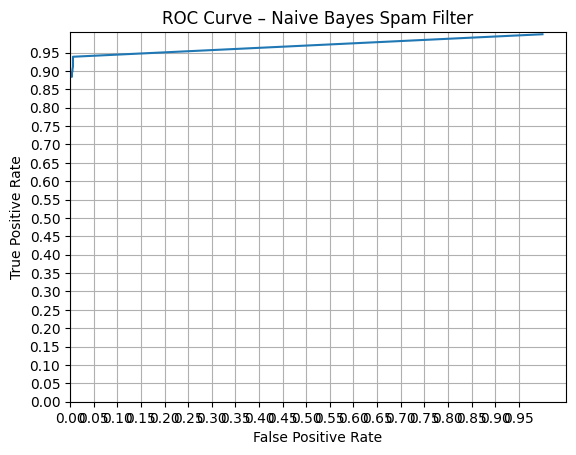

In [30]:
def classify(X, theta, prior_ham, prior_spam, threshold = 0.5):
    """
    np.array[int, int] * np.array[int, int] -> np.array[int]
    """

    classifications = np.zeros(len(X))

    for i, message in enumerate(X):
        likelihood_given_ham = 1
        likelihood_given_spam = 1

        for wordIndex, isInMessage in enumerate(message):
            if isInMessage:
                likelihood_given_spam *= theta[wordIndex][1]
                likelihood_given_ham *= theta[wordIndex][0]
            else:
                likelihood_given_ham *= 1 - theta[wordIndex][0]
                likelihood_given_spam *= 1- theta[wordIndex][1]
        
        #the posterior is given as the product of likelihood and prior (see lecture slide 19) for each class
        posterior_ham = likelihood_given_ham * prior_ham    
        posterior_spam = likelihood_given_spam * prior_spam

        omega = posterior_spam + posterior_ham #sum of the posteriors for all caterories
        p_spam_given_data = posterior_spam/omega  #see lecture slide 19 --> this allows to set a threshold to test how likely the classification is
        p_ham_given_data = posterior_ham/omega #for completeness, not used here

        if p_spam_given_data > threshold:
            classifications[i] = 1      #the spam classification is denoted as 1

    return classifications


classification_testSet = classify(X_test, theta, prior_ham, prior_spam)

### ------------------------------------------------------------------------------------------ ###
# Evaluating the classifications:

import matplotlib.pyplot as plt

def classification_parameters(X, theta, prior_ham, prior_spam):
    thresholds = np.arange(0, 1, 0.1)
    tprs, fprs = [], []

    for threshold in thresholds:
        classifications = classify(X, theta, prior_ham, prior_spam, threshold)

        true_positive = np.sum((classifications == 1) & (Y_test == "spam"))
        false_negative = np.sum((classifications == 0) & (Y_test == "spam"))
        tpr = true_positive/(true_positive + false_negative)      #number of true positives divided by the number of all positives that should exist <--> (1 - false negative rate)
        tprs.append(tpr)
        print(f"The true positive rate = the sensitivity (1 - false negative rate) for a threshold of {threshold} lies at {tpr}")
        
        false_positive = np.sum((classifications == 1) & (Y_test == "ham"))
        true_negative = np.sum((classifications == 0) & (Y_test == "ham"))
        fpr = false_positive/(true_negative + false_positive)    #numberof false positives divided by the number of all negatives that should exist --> 1 - specificity <--> (1 - true negative rate)
        fprs.append(fpr)
        print(f"The false positive rate = 1 - specificity (true negative rate) for a threshold of {threshold} lies at {fpr}")


    f, ax = plt.subplots(1)
    ax.plot(fprs, tprs)
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curve – Naive Bayes Spam Filter')
    ax.grid(True)
    ax.set_yticks(np.arange(0, 1, 0.05))
    ax.set_xticks(np.arange(0, 1, 0.05))
    ax.set_ylim(ymin = 0)
    ax.set_xlim(xmin = 0)
    plt.show(f)

classification_parameters(X_test, theta, prior_ham, prior_spam)


## 5 - Extension of the model 

One extension of the model is to consider a matrix of word counts instead of simply their presence/absence. 
The model will change in various ways in this case: 
   - We will count the total number of occurence in the spam or the ham set for each word.
   - the words are now considered to occur independently along the sentence (independent Multinoulli). Thus, for a document with k words $\mathbf{v}=(v_1,\ldots, v_k)$
    \begin{align}
    \mathbb{P}(\mathbf{v} \mid y = s) 
  & =  \prod_{t=1}^{k} p_{v_t}
    \end{align}
       where $p_v$ is the probability to observe a word $v$
       
Note that with this new model we compute a product over the positions in the sentence while the bernoulli model did a product over all the words in the corpus.

1. Implement the estimation of parameters for this model and the computation of the posterior class probabilities. This question can be interpreted in different ways, please explain your choices.
2. Compare its accuracy and ROC curve with the previous model on a test set (*e.g.* go over section 3 and 4 again for this model).



In [ ]:
def recode_messagesWC(data, corpus):    #WC = word count
    """
    np.array[str, str] * dict[str : int] -> np.array[int, int]

    Uses the sms message matrix and the corpus to construct a matrix of word occurrences and counts per word.  
    """

    number_messages = data.shape[0] #gives the number of messages which should correspond to the number of rows in the binary matrix
    number_words = len(corpus) #gives the number of columns of the binary matrix

    matrixWC = np.zeros(shape = (number_messages, number_words)) #create an empty binary matrix

    for i in range(number_messages):
        message = data[i][1]
        words = message.split()
        
        for word in words:
            matrixWC[i][corpus[word]] += 1

    return matrixWC

sms_matrixWC = recode_messagesWC(sms_data, D)
bin_matrix = (sms_matrixWC > 0).astype(int)

Xc_train, Xc_test, Y_train, Y_test = train_test_split(sms_matrixWC, sms_data[:, 0])
Xb_train, Xb_test, _, _ = train_test_split(bin_matrix, sms_data[:, 0])

#class priors stay the same

def estimate_proportionsWC(X, Y):
    """
    np.array[int, int] * np.array[int] -> np.array[int, int]
    """

    word_number = X.shape[1]    #number of different words in the matrix

    spam_mask = (Y == "spam")   #np.array[bool]

    #those rows that are not spam are exlcuded, the others are summed element-wise
    sum_spam = X[spam_mask].sum(axis = 0)   #np.array[int]
    sum_ham = X[~spam_mask].sum(axis = 0)

    totSpam, totHam = sum_spam.sum(), sum_ham.sum()    #int

    p_spam = (sum_spam + 1)/(totSpam + word_number)
    p_ham = (sum_ham + 1)/(totHam + word_number)
    prior_spam = spam_mask.mean()
    prior_ham = 1 - prior_spam

    return p_ham, p_spam, prior_ham, prior_spam


def estimate_proportionsBin(X, Y):
    """
    np.array[int, int] * np.array[int] -> np.array[int, int]
    """

    word_number = X.shape[1]    #number of different words in the matrix


    spam_mask = (Y == "spam")   #np.array[bool]

    #those rows that are not spam are exlcuded, the others are summed element-wise
    sum_spam = X[spam_mask].sum(axis = 0)   #np.array[int]
    sum_ham = X[~spam_mask].sum(axis = 0)

    totSpam, totHam = (Y == "spam").sum(), (Y == "ham").sum()    #int

    #as in the function before: estimate thetas for each category by MAP and beta function
    theta_spam = (sum_spam + 1) / (totSpam + 2)
    theta_ham  = (sum_ham  + 1) / (totHam  + 2)
    #estimate priors
    p_spam = totSpam / (totSpam + totHam)
    p_ham  = 1 - p_spam
    
    return theta_ham, theta_spam, p_ham, p_spam



def classifyWC():
    """
    np.array[int, int] * np.array[int, int] -> np.array[int]
    """

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
